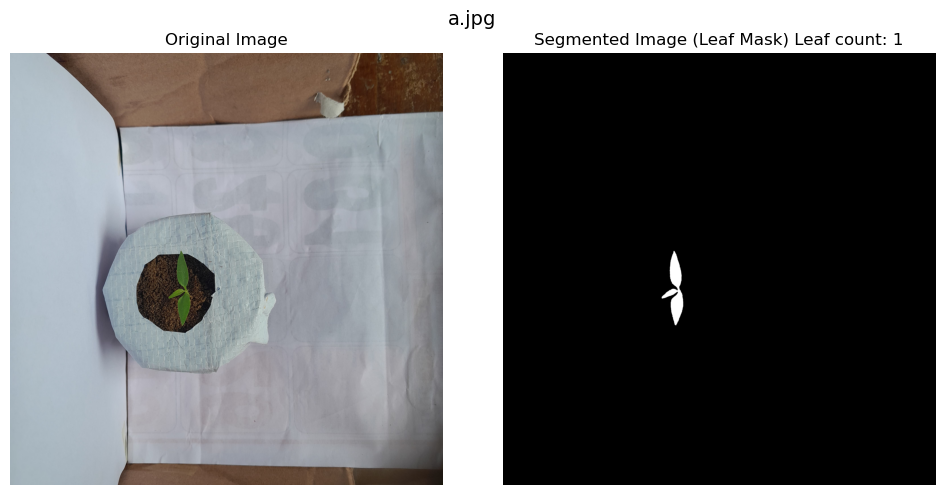

[1] Done: a.jpg — Leaf count: 1


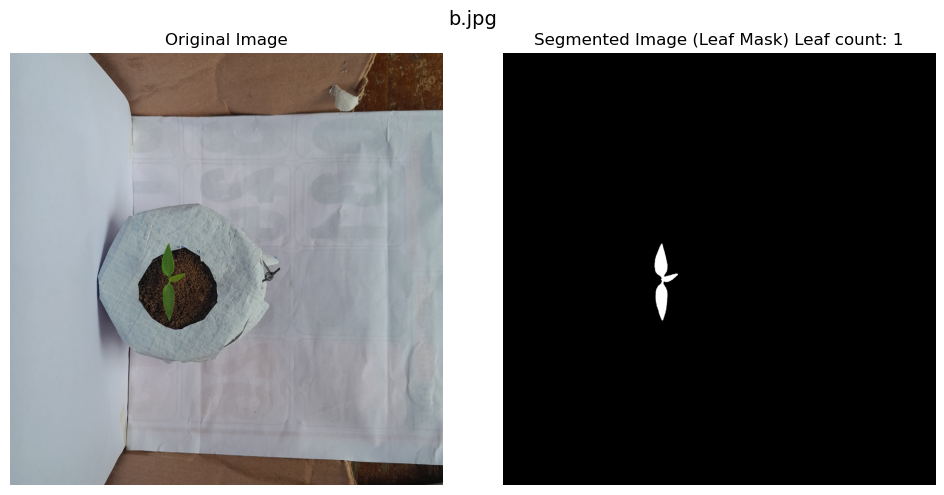

[2] Done: b.jpg — Leaf count: 1


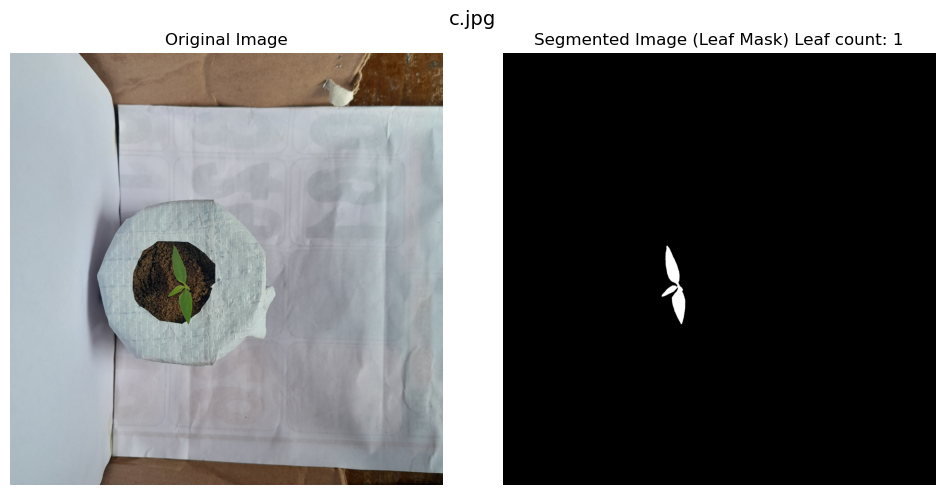

[3] Done: c.jpg — Leaf count: 1


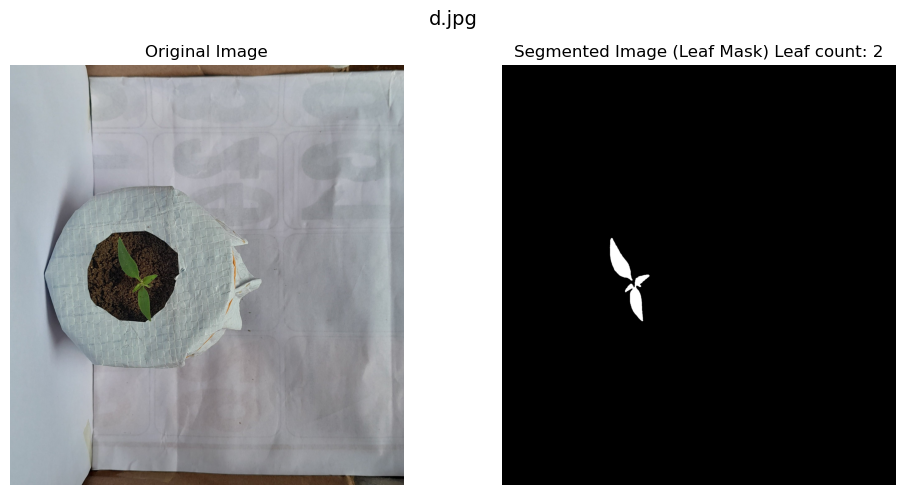

[4] Done: d.jpg — Leaf count: 2


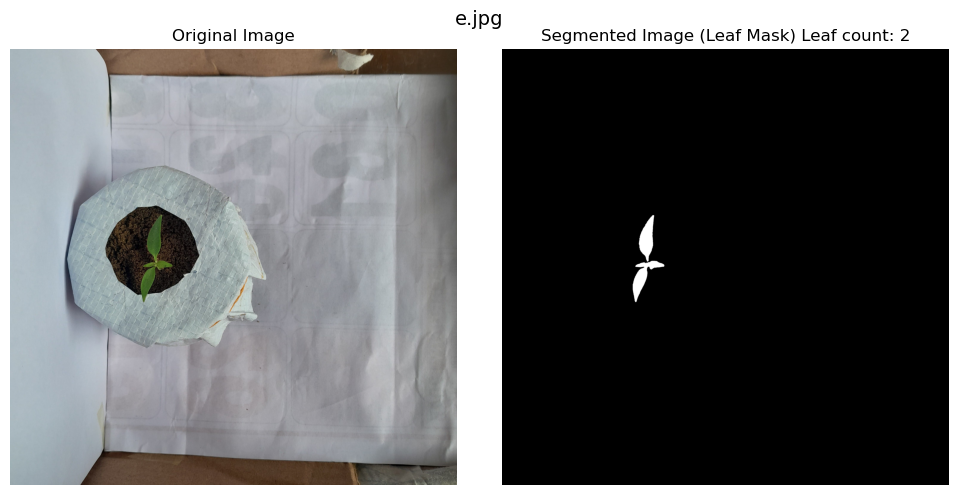

[5] Done: e.jpg — Leaf count: 2


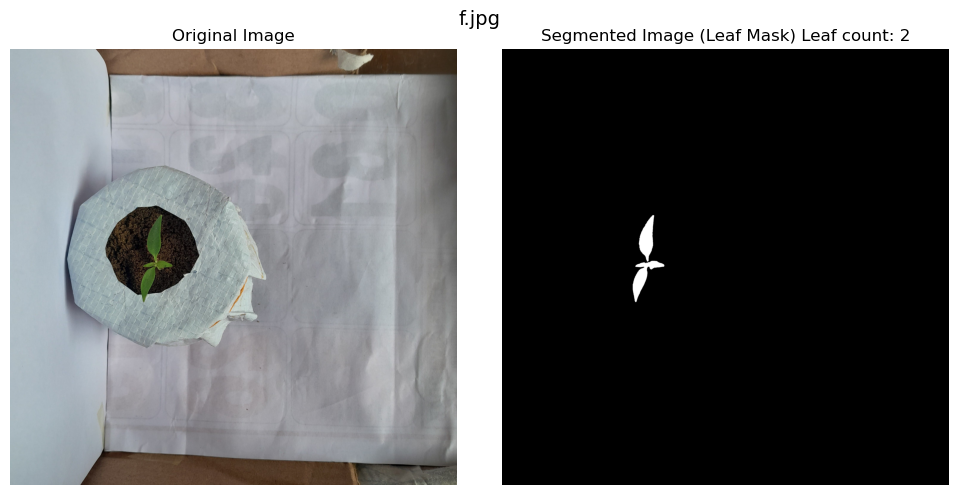

[6] Done: f.jpg — Leaf count: 2


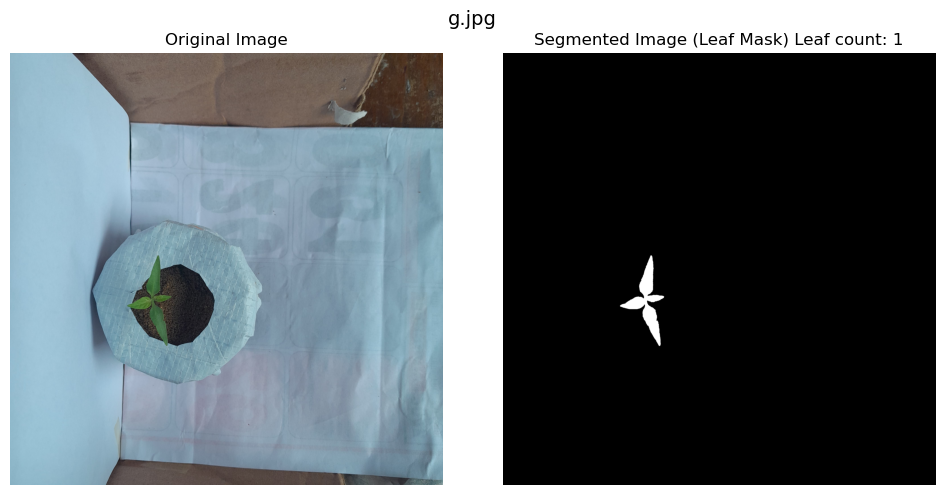

[7] Done: g.jpg — Leaf count: 1


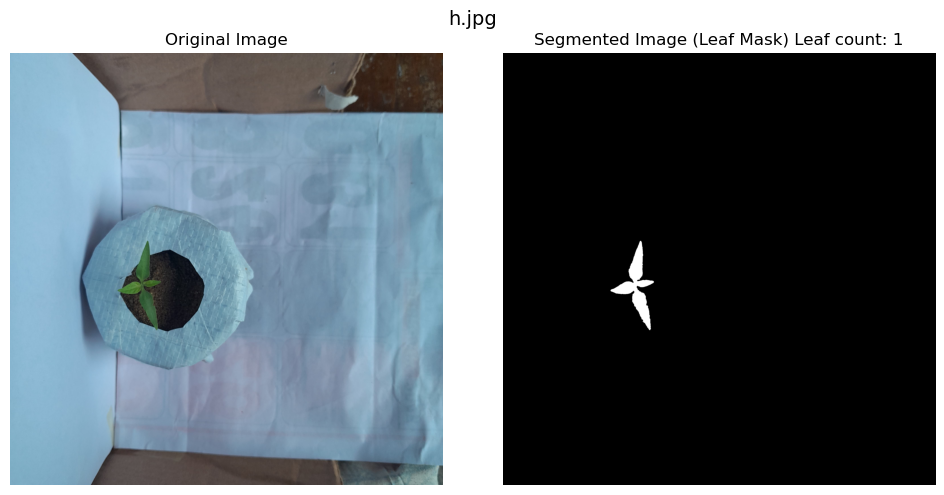

[8] Done: h.jpg — Leaf count: 1


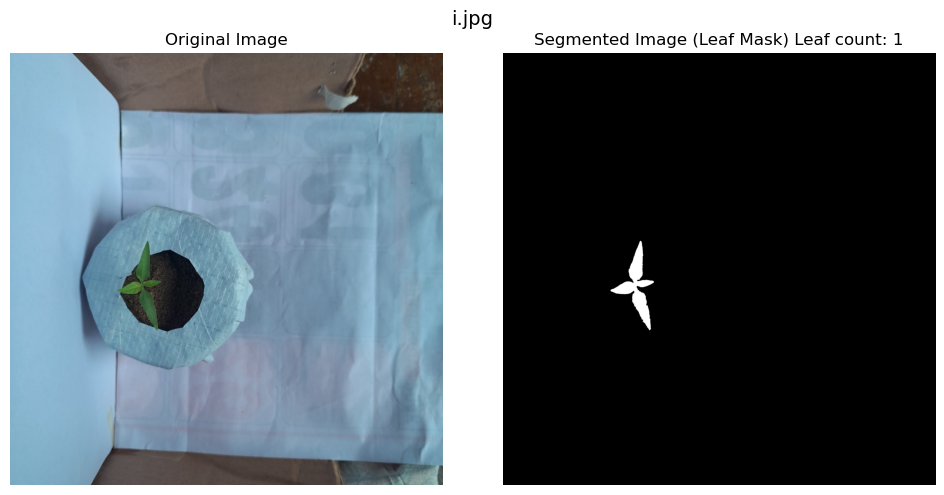

[9] Done: i.jpg — Leaf count: 1


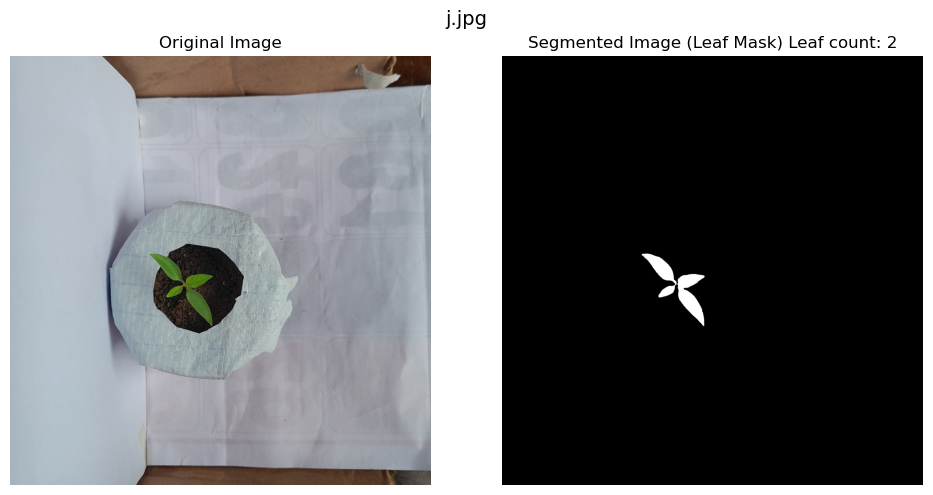

[10] Done: j.jpg — Leaf count: 2


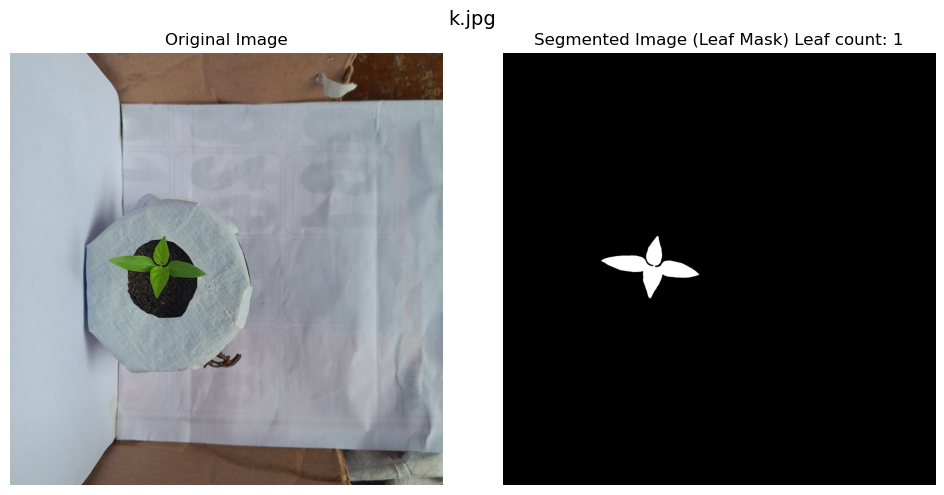

[11] Done: k.jpg — Leaf count: 1


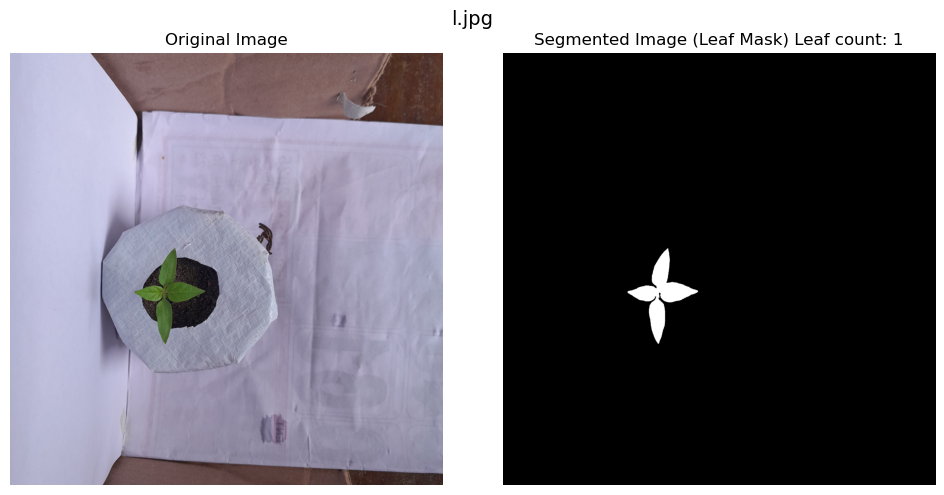

[12] Done: l.jpg — Leaf count: 1


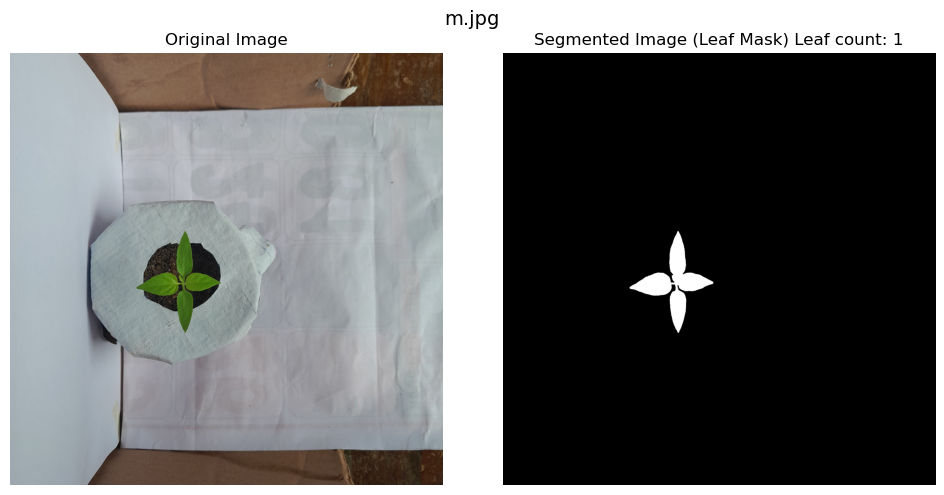

[13] Done: m.jpg — Leaf count: 1


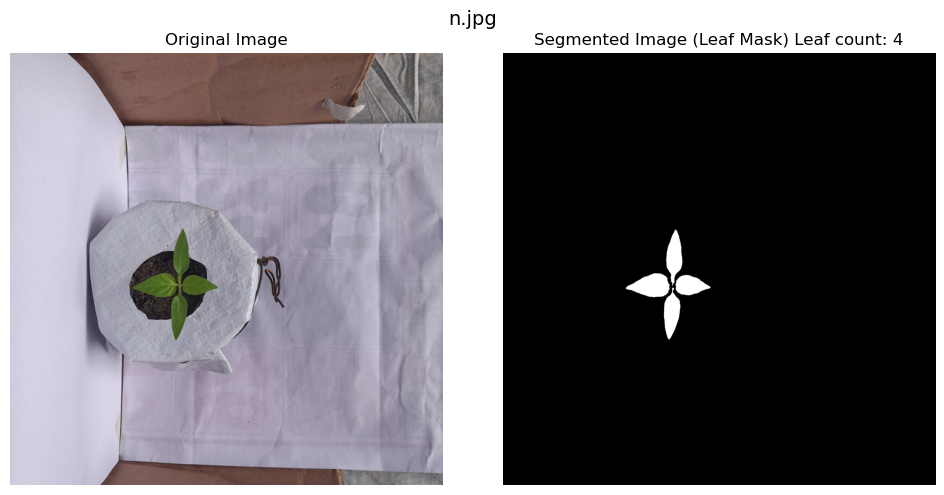

[14] Done: n.jpg — Leaf count: 4


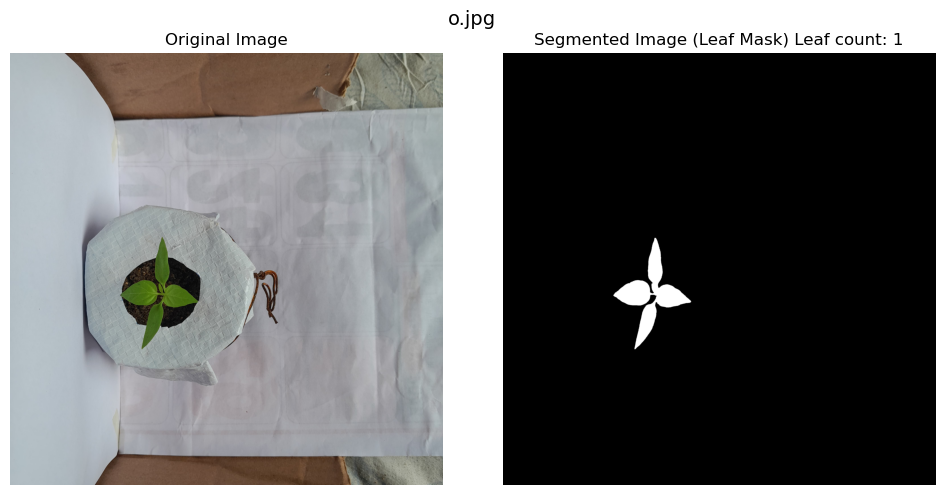

[15] Done: o.jpg — Leaf count: 1


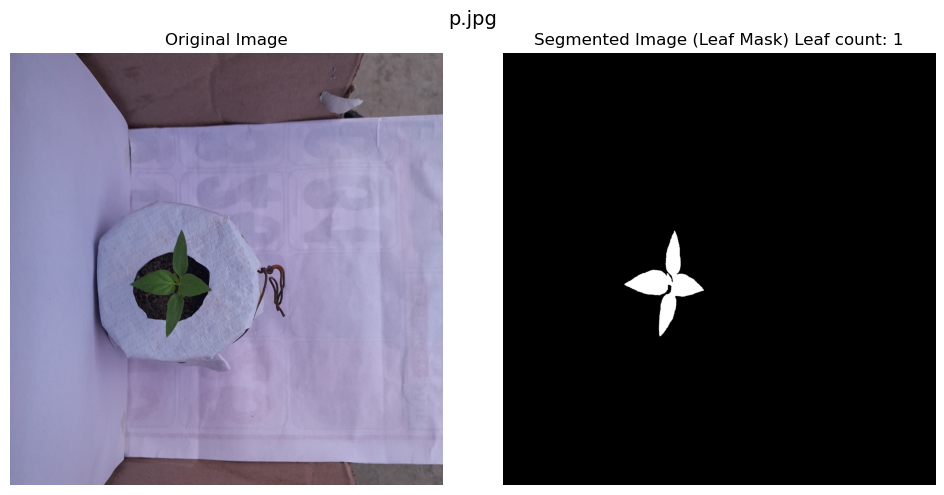

[16] Done: p.jpg — Leaf count: 1


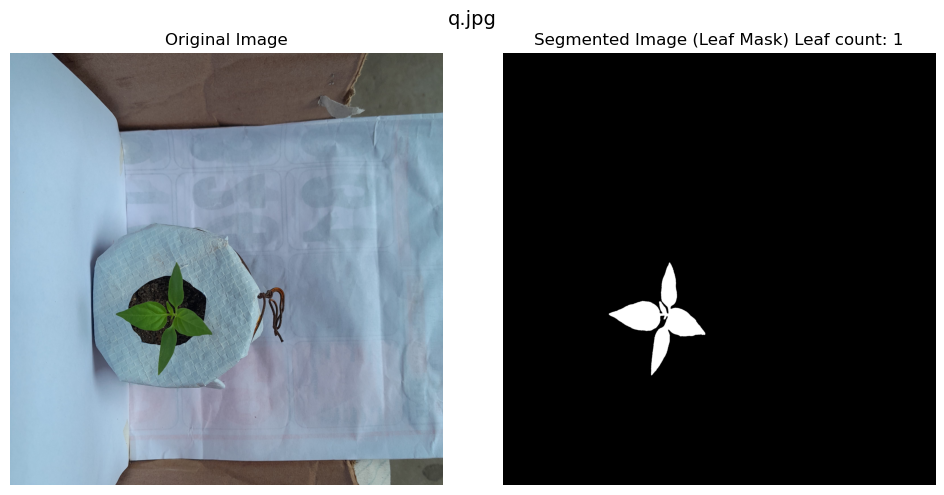

[17] Done: q.jpg — Leaf count: 1


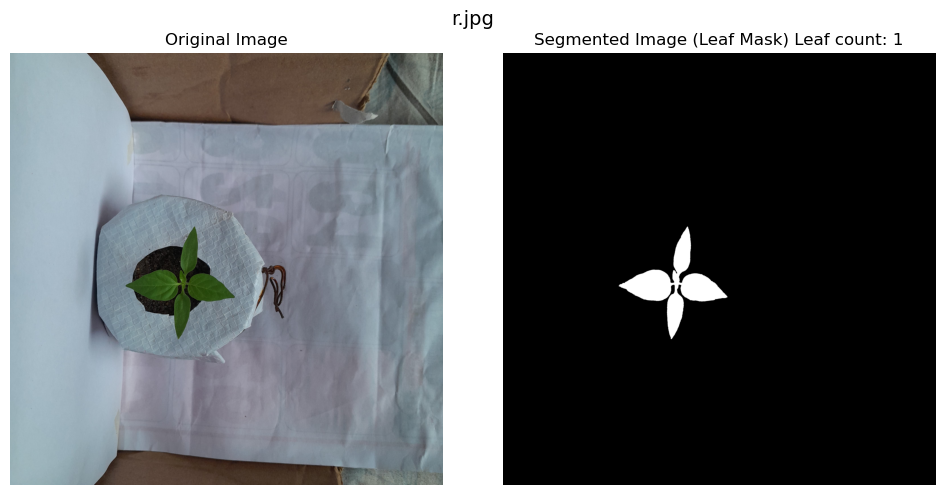

[18] Done: r.jpg — Leaf count: 1


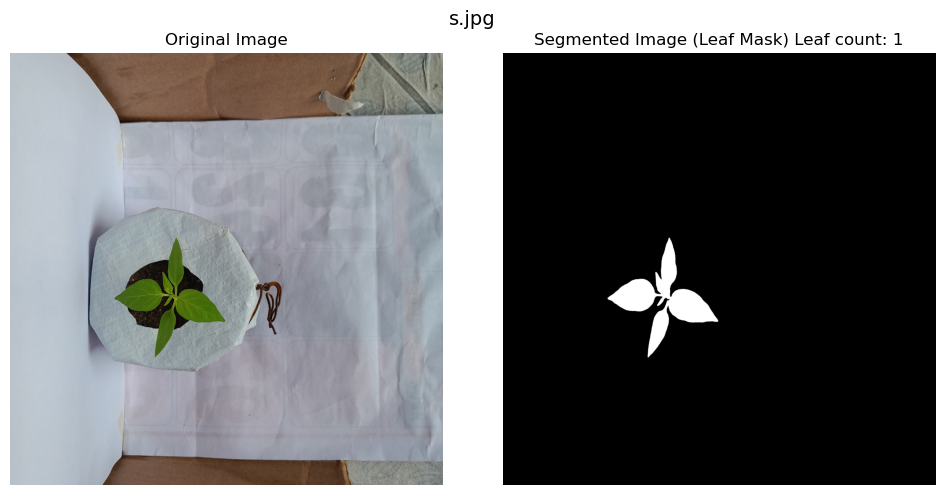

[19] Done: s.jpg — Leaf count: 1


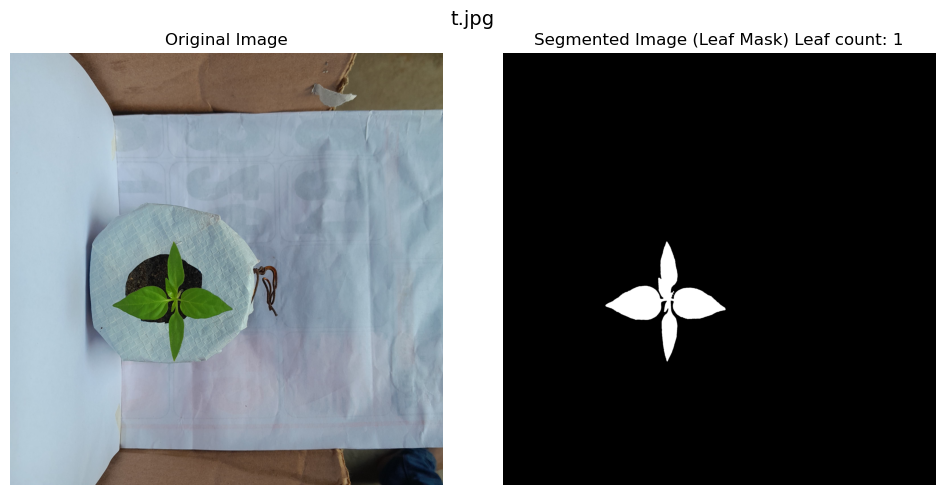

[20] Done: t.jpg — Leaf count: 1


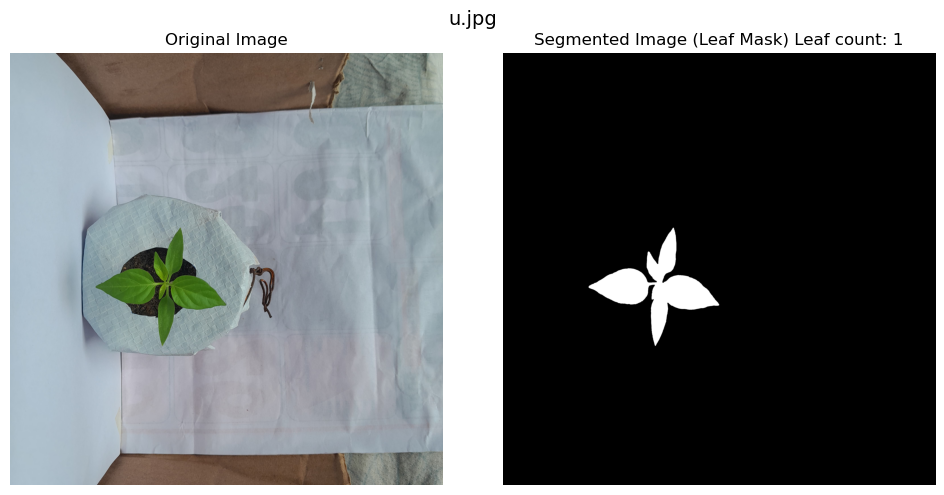

[21] Done: u.jpg — Leaf count: 1


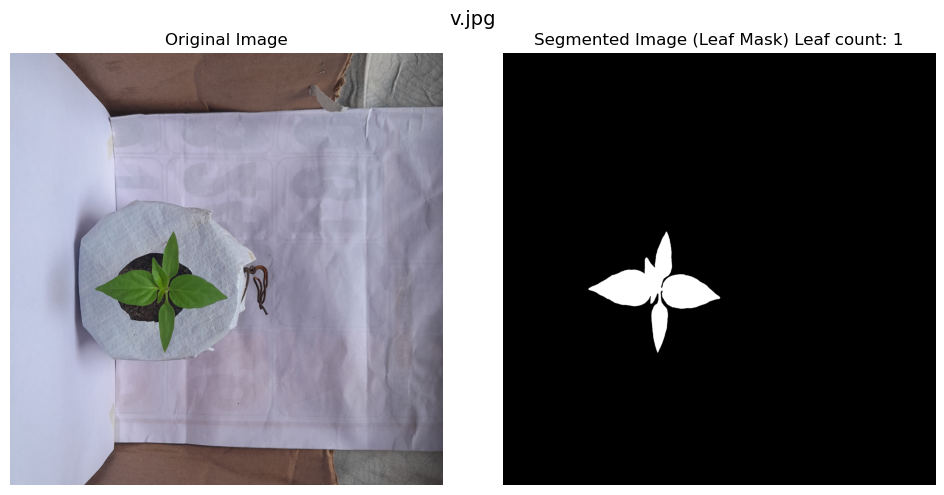

[22] Done: v.jpg — Leaf count: 1


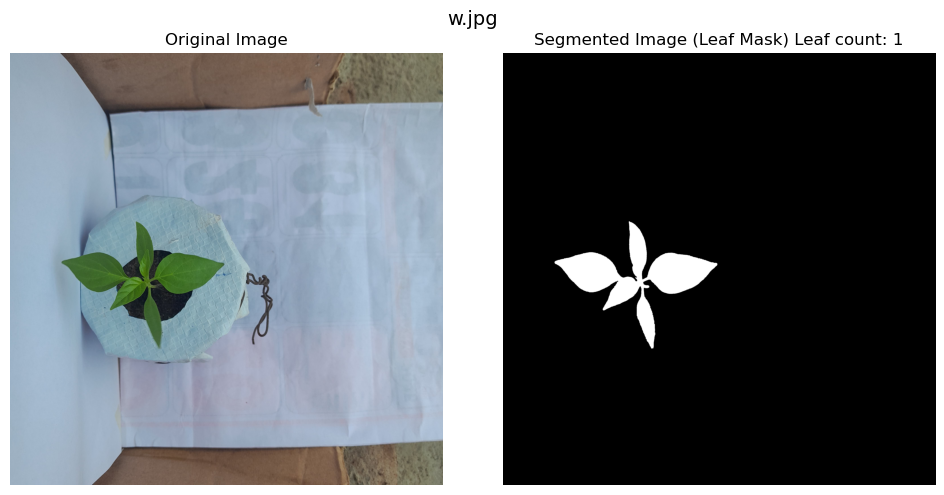

[23] Done: w.jpg — Leaf count: 1


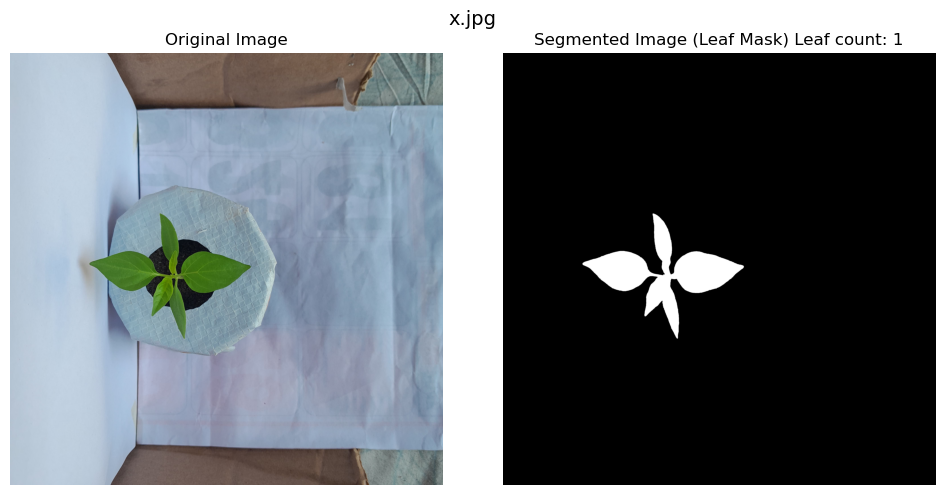

[24] Done: x.jpg — Leaf count: 1


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


image_folder = "top_view_pics"  # Folder path for top view images
valid_extensions = ('.jpg', '.jpeg', '.png')
min_leaf_area = 500  # Minimum area to consider a contour as a leaf

# LOAD IMAGE FILES 
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(valid_extensions)]

# PROCESS EACH IMAGE
for idx, filename in enumerate(sorted(image_files), 1):
    image_path = os.path.join(image_folder, filename)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image {filename}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Green Color Threshold
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Noise Reduction
    kernel = np.ones((3, 3), np.uint8)
    noise_reduced = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    noise_reduced = cv2.morphologyEx(noise_reduced, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Contour Detection
    contours, _ = cv2.findContours(noise_reduced, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    leaf_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_leaf_area]

    # Create Segmented Output
    segmented = np.zeros_like(img_rgb)
    for cnt in leaf_contours:
        cv2.drawContours(segmented, [cnt], -1, (255, 255, 255), thickness=cv2.FILLED)

    # Display
    plt.figure(figsize=(10, 5))

    # 1. Original
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # 2. Segmented Image
    plt.subplot(1, 2, 2)
    plt.imshow(segmented)
    plt.title(f'Segmented Image (Leaf Mask) Leaf count: {len(leaf_contours)}')
    plt.axis('off')  

    plt.suptitle(f"{filename}", fontsize=14)
    plt.tight_layout()
    plt.show()

    print(f"[{idx}] Done: {filename} — Leaf count: {len(leaf_contours)}")
